<a href="https://colab.research.google.com/github/jtbigdata/USA_ACCIDENTS/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>US Accident</h1>

<h2>Dataset</h2>
<p>En este notebook vamos a analizar un dataset público de kaggle. Esta es una base de datos de accidentes de tráfico en USA, quecontempla los 49 estados. Los datos se recopilan de manera continua desde febrero de 2016, utilizando varios proveedores de datos, incluyendo múltiples API que proporcionan datos de eventos de tráfico en tiempo real. Estas API transmiten eventos de tráfico capturados por diversas entidades, como los departamentos de transporte de EE. UU. y de los estados, agencias de aplicación de la ley, cámaras de tráfico y sensores de tráfico en las redes viales. Actualmente, hay alrededor de 1.5 millones de registros de accidentes en esta base de datos. Consulta las descripciones a continuación para obtener información más detallada.

Por conveniencia (capacidad de memoria), el data set inicial se redujo a los 5 estados con más accidentes y también se tomó una fracción aleatoria del 0.01 de los datos totales.

La dirección donde se encuentra esta base de datos es <a href="https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents"> https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents </a>.
 </p>

<h2>Librerías necesarias.</h2>

In [1]:
# import all necesary libraries
import numpy as np
import pandas as pd

import plotly.express as px


#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Importamos la base de datos.</h2>

In [4]:
url=r'/content/drive/MyDrive/Colab Notebooks/US_Accident/Fraccion_001.csv'
df = pd.read_csv(url,sep=',',encoding='latin-1')

In [5]:
print('====================df.info()======================================')
print(df.info())

====================df.info()======================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39350 entries, 0 to 39349
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     39350 non-null  object 
 1   Source                 39350 non-null  object 
 2   Severity               39350 non-null  int64  
 3   Start_Time             39350 non-null  object 
 4   End_Time               39350 non-null  object 
 5   Start_Lat              39350 non-null  float64
 6   Start_Lng              39350 non-null  float64
 7   End_Lat                22628 non-null  float64
 8   End_Lng                22628 non-null  float64
 9   Distance(mi)           39350 non-null  float64
 10  Description            39350 non-null  object 
 11  Street                 39305 non-null  object 
 12  City                   39350 non-null  object 
 13  County                 39350 non-null 

<h2>Limpieza de la base de datos.</h2>

In [6]:
nuevos_nombres = {'ID':'ID','Source':'Fuente_info',
                  'Severity':'Severidad',
                  'Start_Time':'T_i',
                  'Start_Time':'T_i',
                  'End_Time':'T_f',
                  'Start_Lat':'Lat_i',
                  'Start_Lng':'Lng_i',
                  'End_Lat':'Lat_f',
                  'End_Lng':'Lng_f',
                  'Distance(mi)':'Distancia',
                  'Description':'Descripcion',
                  'Street':'Calle',
                  'City':'Ciudad',
                  'County':'Condado',
                  'State':'Provincia',
                  'Zipcode':'CP',
                  'Country':'Pais',
                  'Timezone':'Zona_horaria',
                  'Airport_Code':'Estacion_met',
                  'Weather_Timestamp':'Marca_tiempo',
                  'Temperature(F)':'Temp',
                  'Wind_Chill(F)':'Sensacion_termica',
                  'Humidity(%)':'Humedad',
                  'Pressure(in)':'Presion',
                  'Visibility(mi)':'Visibilidad',
                  'Wind_Direction':'Dir_Viento',
                  'Wind_Speed(mph)':'Vel_viento',
                  'Precipitation(in)':'Precipitacion',
                  'Weather_Condition':'Condicion_clima',
                  'Amenity':'Servicios_cercano',
                  'Crossing':'Cruce_cercano',
                  'Give_Way':'Cedaelpaso',
                  'Junction':'Union_cercana',
                  'No_Exit':'Sin_salida',
                  'Railway':'Viasdetren',
                  'Roundabout':'Rotonda',
                  'Station':'Estacion_cercana',
                  'Stop':'Parar',
                  'Traffic_Calming': "Reduccion_velocidad" ,
                  'Traffic_Signal':'Senal_trafico',
                  'Turning_Loop':'Bucle_giro',
                  'Sunrise_Sunset':'Amanecer_atardecer',
                  'Civil_Twilight':'Periodo_dia',
                  'Nautical_Twilight':'Crepusculo_nautico',
                  'Astronomical_Twilight':'Crepusculo_astronomico',
                 }

# Reemplazar los nombres de las columnas utilizando el método rename
df = df.rename(columns=nuevos_nombres)

In [7]:
df.columns

Index(['ID', 'Fuente_info', 'Severidad', 'T_i', 'T_f', 'Lat_i', 'Lng_i',
       'Lat_f', 'Lng_f', 'Distancia', 'Descripcion', 'Calle', 'Ciudad',
       'Condado', 'Provincia', 'CP', 'Pais', 'Zona_horaria', 'Estacion_met',
       'Marca_tiempo', 'Temp', 'Sensacion_termica', 'Humedad', 'Presion',
       'Visibilidad', 'Dir_Viento', 'Vel_viento', 'Precipitacion',
       'Condicion_clima', 'Servicios_cercano', 'Bump', 'Cruce_cercano',
       'Cedaelpaso', 'Union_cercana', 'Sin_salida', 'Viasdetren', 'Rotonda',
       'Estacion_cercana', 'Parar', 'Reduccion_velocidad', 'Senal_trafico',
       'Bucle_giro', 'Amanecer_atardecer', 'Periodo_dia', 'Crepusculo_nautico',
       'Crepusculo_astronomico'],
      dtype='object')

In [8]:
#============================================================
# Calcular el porcentaje para cada Provincia
porcentajes = df['Provincia'].value_counts(normalize=True) * 100

# Crear el gráfico de pastel
fig = px.pie(names=porcentajes.index, values=porcentajes.values, title='Porcentaje de Provincias (Top 5)')

# Mostrar el gráfico
fig.show()

In [9]:
#Vemos cuales son los valores nulos por cada columna
df.isnull().sum()

ID                            0
Fuente_info                   0
Severidad                     0
T_i                           0
T_f                           0
Lat_i                         0
Lng_i                         0
Lat_f                     16722
Lng_f                     16722
Distancia                     0
Descripcion                   0
Calle                        45
Ciudad                        0
Condado                       0
Provincia                     0
CP                           14
Pais                          0
Zona_horaria                 56
Estacion_met                 82
Marca_tiempo                539
Temp                        817
Sensacion_termica         11104
Humedad                     871
Presion                     642
Visibilidad                 743
Dir_Viento                  846
Vel_viento                 2932
Precipitacion             11623
Condicion_clima             706
Servicios_cercano             0
Bump                          0
Cruce_ce

In [10]:
#Como queremos predecir la severidad del accidente, podemos eliminar algunas columnas.

In [11]:
borrar=['Lat_f','Lng_f','T_f','Distancia','Sensacion_termica','Fuente_info','ID','Descripcion']
df= df.drop(columns=borrar)

In [12]:
#Borramos las filas que contengan valores nulos en las columnas->'Amanecer_atardecer','Periodo_dia','Crepusculo_nautico','Crepusculo_astronomico'
df = df.dropna(subset=['Amanecer_atardecer','Periodo_dia','Crepusculo_nautico','Crepusculo_astronomico'])

In [13]:
#Definimos una data frame (df2) que contenga solo esas columnas

df2=df[['Amanecer_atardecer','Periodo_dia','Crepusculo_nautico','Crepusculo_astronomico']]
print('-----')
print(df2['Amanecer_atardecer'].value_counts())
print('-----')
print(df2['Periodo_dia'].value_counts())
print('-----')
print(df2['Crepusculo_nautico'].value_counts())
print('-----')
print(df2['Crepusculo_astronomico'].value_counts())

-----
Day      26994
Night    12275
Name: Amanecer_atardecer, dtype: int64
-----
Day      28764
Night    10505
Name: Periodo_dia, dtype: int64
-----
Day      30680
Night     8589
Name: Crepusculo_nautico, dtype: int64
-----
Day      32228
Night     7041
Name: Crepusculo_astronomico, dtype: int64


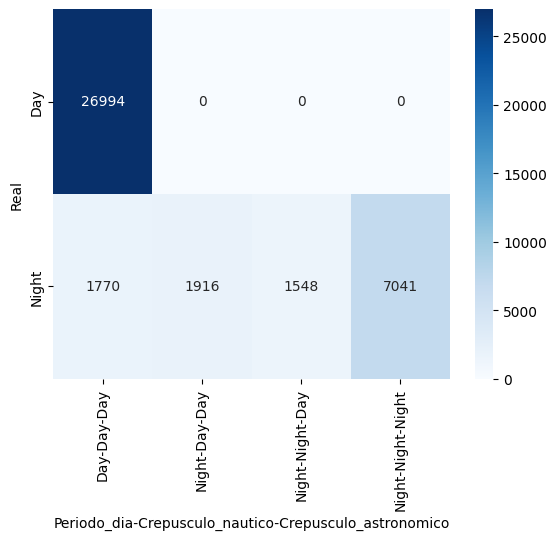

In [14]:
# Crear una matriz de confusión adaptada para cuatro columnas
matriz_confusion = pd.crosstab(df2['Amanecer_atardecer'],
                               [df2['Periodo_dia'],df2['Crepusculo_nautico'],df2['Crepusculo_astronomico']],
                               rownames=['Real']#, colnames=['Predicción B', 'Predicción C', 'Predicción D']
                               )

# Visualizar la matriz de confusión
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues')
plt.show()

In [15]:
# ==============Calcular la frecuencia de cada combinación de Provincia y Severidad==========
frecuencia = df.groupby(['Provincia', 'Severidad']).size().reset_index(name='count')

# Calcular el porcentaje para cada combinación de Provincia y Severidad
frecuencia['percentage'] = frecuencia['count'] / frecuencia.groupby('Provincia')['count'].transform('sum') * 100


#print(frecuencia)
# Crear el gráfico de barras
fig = px.bar(frecuencia, x="Provincia", y="percentage", color="Severidad", barmode="group")

# Mostrar el gráfico
fig.show()

In [16]:
#convertimos la columna T_i a datetime
df['T_i'] = pd.to_datetime(df['T_i'])

In [17]:
#Ahora revisamos algunas de las columnas con variables categóricas

In [18]:
nombre= ['Pais', 'Zona_horaria',
         'Servicios_cercano',
         'Bump', 'Cruce_cercano',
         'Cedaelpaso','Union_cercana',
         'Sin_salida', 'Viasdetren',
         'Rotonda','Estacion_cercana',
         'Parar','Reduccion_velocidad',
         'Senal_trafico','Bucle_giro']

for i in nombre:
  print(i,df[i].unique().size)

Pais 1
Zona_horaria 5
Servicios_cercano 2
Bump 2
Cruce_cercano 2
Cedaelpaso 2
Union_cercana 2
Sin_salida 2
Viasdetren 2
Rotonda 1
Estacion_cercana 2
Parar 2
Reduccion_velocidad 2
Senal_trafico 2
Bucle_giro 1


In [19]:
df = df.drop(['Pais','Bucle_giro'], axis=1)

In [20]:
df.Bump.value_counts()

False    39252
True        17
Name: Bump, dtype: int64

In [21]:
df = df.drop(['Bump'], axis=1)

In [22]:
df.Dir_Viento.unique()

array(['SE', 'NE', 'CALM', 'SW', 'S', 'ENE', 'WNW', 'West', 'VAR', 'NNE',
       'E', nan, 'SSW', 'South', 'N', 'NW', 'Variable', 'SSE', 'Calm',
       'NNW', 'WSW', 'ESE', 'North', 'East', 'W'], dtype=object)

In [23]:
# Crear un diccionario de mapeo
mapeo_direcciones = {
    'SW': 'Suroeste',
    'NW': 'Noroeste',
    'WNW': 'Noroeste',
    'VAR': 'Variable',
    'ESE': 'Suroeste',
    'ENE': 'Noreste',
    'WSW': 'Suroeste',
    'Calm': 'Calma',
    'East': 'Este',
    'CALM': 'Calma',
    'S': 'Sur',
    'W': 'Oeste',
    'SE': 'Sureste',
    'North': 'Norte',
    'NNW': 'Noroeste',
    'E': 'Este',
    'N': 'Norte',
    'SSE': 'Sureste',
    'NNE': 'Noreste',
    'SSW': 'Suroeste',
    'NE': 'Noreste',
    'West': 'Oeste',
    'South': 'Sur',
    'Variable': 'Variable',
    None: None  # Manejar NaN si es necesario
}


# Aplicar el mapeo a la columna Dir_Viento
df['Dir_Viento'] = df['Dir_Viento'].map(mapeo_direcciones)

In [24]:
# Mostrar el DataFrame resultante
print(df.Dir_Viento.value_counts())

Calma       7364
Suroeste    6845
Noroeste    4932
Noreste     3889
Sureste     3539
Oeste       2942
Sur         2646
Este        2199
Variable    2068
Norte       2007
Name: Dir_Viento, dtype: int64


In [25]:
df.Condicion_clima.unique()

array(['Cloudy', 'Fair', 'Mostly Cloudy', 'Overcast', 'Light Rain',
       'Partly Cloudy', 'Rain', 'Clear', 'Haze',
       'Showers in the Vicinity', 'Mostly Cloudy / Windy', nan,
       'Partly Cloudy / Windy', 'Light Snow', 'Scattered Clouds',
       'Thunder in the Vicinity', 'Fog', 'Light Thunderstorms and Rain',
       'Light Drizzle', 'Fair / Windy', 'Light Freezing Rain',
       'Heavy Snow', 'Heavy Thunderstorms and Rain', 'T-Storm',
       'Heavy Rain', 'Smoke', 'Light Rain with Thunder',
       'N/A Precipitation', 'Light Snow and Sleet', 'Light Snow / Windy',
       'Snow', 'Drizzle', 'Thunderstorms and Rain', 'Mist',
       'Light Rain / Windy', 'Heavy T-Storm', 'Cloudy / Windy',
       'Thunderstorm', 'Thunder', 'Haze / Windy', 'Light Rain Showers',
       'Thunder / Windy', 'Shallow Fog', 'Rain / Windy', 'Wintry Mix',
       'Heavy Rain / Windy', 'Patches of Fog', 'Blowing Dust / Windy',
       'T-Storm / Windy', 'Widespread Dust / Windy',
       'Heavy T-Storm / Windy',

In [26]:
mapeo_condiciones = {'Fair': 'Despejado',
                     'Partly Cloudy': 'Nublado',
                     'Overcast': 'Nublado',
                     'Cloudy':'Nublado',
                     'Clear': 'Despejado',
                     'Mostly Cloudy': 'Nublado',
                     'Light Rain': 'Lluvia Ligera',
                     'T-Storm': 'Tormentas',
                     'Scattered Clouds': 'Despejado',
                     'Rain': 'Lluvia',
                     'Fog': 'Neblina',
                     'Light Snow': 'Nieve',
                     'Thunder': 'Tormentas',
                     'Partly Cloudy / Windy': 'Nublado/Ventoso',
                     'Haze': 'Neblina',
                     'Heavy Rain': 'Lluvia Intensa',
                     'Fair / Windy': 'Despejado/Ventoso',
                     'Heavy Thunderstorms and Rain': 'Tormentas/Lluvia Intensa',
                     'Light Rain with Thunder': 'Lluvia Ligera/Truenos',
                     'Mostly Cloudy / Windy': 'Nublado/Ventoso',
                     'Thunder in the Vicinity': 'Tormentas',
                     'Cloudy / Windy': 'Nublado/Ventoso',
                     'Rain / Windy': 'Lluvia/Ventoso',
                     'Wintry Mix': 'Mezcla Invernal',
                     'Smoke': 'Humo','Light Freezing Rain': 'Lluvia Ligera/Congelación',
                     'Light Drizzle': 'Lluvia Ligera',
                     'Heavy T-Storm': 'Tormentas Intensas',
                     'Light Rain / Windy': 'Lluvia Ligera/Ventoso',
                     'Snow': 'Nieve',
                     'Mist': 'Neblina',
                     'Light Rain Showers': 'Lluvia Ligera',
                     'Thunderstorm': 'Tormentas',
                     'Light Snow / Windy': 'Nieve Ligera/Ventoso',
                     'Light Thunderstorms and Rain': 'Tormentas/Lluvia',
                     'Drizzle':'Lluvia Ligera',
                     'T-Storm / Windy': 'Tormentas/Ventoso',
                     'Shallow Fog': 'Neblina Ligera',
                     'Thunderstorms and Rain': 'Tormentas/Lluvia',
                     'Heavy Drizzle': 'Lluvia',
                     'Blowing Dust / Windy': 'Polvo/Ventoso',
                     'Snow and Sleet': 'Nieve',
                     'Thunder / Windy': 'Tormentas/Ventoso',
                     'Patches of Fog': 'Neblina',
                     'Haze / Windy': 'Neblina/Ventoso',
                     'Showers in the Vicinity': None,
                     'Fog / Windy': 'Neblina/Ventoso',
                     'N/A Precipitation': None,
                     'Widespread Dust': 'Polvo',
                     'Blowing Dust': 'Polvo',
                     'Heavy Snow': 'Nieve Intensa',
                     'Snow / Windy': 'Nieve/Ventoso',
                     'Heavy T-Storm / Windy': 'Tormentas Intensas/Ventoso',
                     'Wintry Mix / Windy': 'Mezcla Invernal/Ventoso',
                     'Heavy Rain / Windy': 'Lluvia Intensa/Ventoso',
                     'Blowing Snow': 'Nieve Ligera',
                     'Light Sleet': 'Nieve Ligera',
                     'Light Freezing Drizzle': 'Lluvia Ligera/Congelación',
                     'Heavy Snow / Windy': 'Nieve Intensa/Ventoso',
                     'Light Snow and Sleet / Windy': 'Nieve Ligera/Ventoso',
                     'Smoke / Windy': 'Humo/Ventoso',
                     'Freezing Rain': 'Lluvia/Congelación',
                     'Light Rain Shower': 'Lluvia',
                     'Light Snow and Sleet': 'Nieve Ligera',
                     'Squalls': 'Ventoso',
                     'Light Ice Pellets':'Congelación',
                     'Drizzle and Fog': 'Lluvia Ligera/Neblina',
                     'Blowing Snow / Windy': 'Nieve/Ventoso',
                     'Rain Showers': 'Lluvia Intensa',
                     'Tornado': 'Tormentas Intensas',
                     'Rain Shower': 'Lluvia',
                     'Snow and Sleet / Windy': 'Nieve/Ventoso',
                     'Light Freezing Fog': 'Neblina Ligera/Congelación',
                     'Sleet': 'Nieve',
                     'Light Drizzle / Windy': 'Lluvia Ligera/Ventoso',
                     'Ice Pellets': 'Congelación','Heavy Sleet': 'Nieve',
                     'Sand / Windy': 'Arena/Ventoso',
                     'Heavy Rain Shower':'Lluvia Intensa',
                     'Light Haze': 'Neblina Ligera',
                     'Partial Fog': 'Neblina Ligera',
                     None: None,
                     'Light Hail':'Granizo',
                     'Widespread Dust / Windy': 'Polvo/Ventoso'
    # Manejar NaN si es necesario
    # ... Puedes continuar agregando más mapeos según sea necesario
}

# Aplicar el mapeo a la columna Condicion_clima
df['Condicion_clima'].replace(mapeo_condiciones, inplace=True)

In [27]:
df.Condicion_clima.unique()

array(['Nublado', 'Despejado', 'Lluvia Ligera', 'Lluvia', 'Neblina', None,
       'Nublado/Ventoso', 'Nieve', 'Tormentas', 'Tormentas/Lluvia',
       'Despejado/Ventoso', 'Lluvia Ligera/Congelación', 'Nieve Intensa',
       'Tormentas/Lluvia Intensa', 'Lluvia Intensa', 'Humo',
       'Lluvia Ligera/Truenos', 'Nieve Ligera', 'Nieve Ligera/Ventoso',
       'Lluvia Ligera/Ventoso', 'Tormentas Intensas', 'Neblina/Ventoso',
       'Tormentas/Ventoso', 'Neblina Ligera', 'Lluvia/Ventoso',
       'Mezcla Invernal', 'Lluvia Intensa/Ventoso', 'Polvo/Ventoso',
       'Tormentas Intensas/Ventoso', 'Polvo',
       'Neblina Ligera/Congelación', 'Nieve/Ventoso', 'Congelación',
       'Granizo', 'Humo/Ventoso', 'Nieve Intensa/Ventoso'], dtype=object)

In [28]:
# Dividir la columna 'Condicion_clima' en múltiples columnas
condiciones_divididas = df['Condicion_clima'].str.split('/', expand=True)

# Obtener dummies para la columna 'Condicion_clima'
condiciones_climaticas_dummies = pd.get_dummies(df['Condicion_clima'].apply(pd.Series).stack()).sum(level=0)

# Concatenar las nuevas columnas booleanas al DataFrame original
df = pd.concat([df, condiciones_climaticas_dummies], axis=1)

<ipython-input-28-d88c120a9dce>:5: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-28-d88c120a9dce>:5: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-28-d88c120a9dce>:5: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-28-d88c120a9dce>:5: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-28-d88c120a9dce>:5: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-i

In [29]:
#df = df.drop(['Condicion_clima'], axis=1)
#df.info()

In [30]:
#revisamos la columna Marca_tiempo

In [31]:
df['Marca_tiempo'] = pd.to_datetime(df['Marca_tiempo'],format='%Y-%m-%d %H:%M:%S')

In [32]:
# average difference between weather time and start time
print("Mean difference between 'Start_Time' and 'Weather_Timestamp': ",
(df.Marca_tiempo - df.T_i).mean())

Mean difference between 'Start_Time' and 'Weather_Timestamp':  0 days 00:01:01.379240022


In [33]:
df = df.drop(['Marca_tiempo'], axis=1)

In [34]:
#Arreglamos la columna T_i

In [35]:
# Crear una nueva columna 'Año' y asignar los años correspondientes de la columna 'T_i'
df['Año'] = df['T_i'].dt.year

# Crear una nueva columna 'Mes' y asignar los meses correspondientes de la columna 'T_i'
nmonth = df['T_i'].dt.month
df['Mes'] = nmonth

# Crear una nueva columna 'Dia_semana' y asignar los días de la semana correspondientes (0 para lunes, 6 para domingo)
df['Dia_semana'] = df['T_i'].dt.weekday

# Calcular la suma acumulativa de días para cada mes hasta el momento
days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))

# Calcular el día del año sumando el valor del mes y el día
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df['T_i'].dt.day.values
df['Dia'] = nday

# Crear una nueva columna 'Hora' y asignar las horas correspondientes de la columna 'T_i'
df['Hora'] = df['T_i'].dt.hour

# Crear una nueva columna 'Minuto' que representa el tiempo en minutos a partir de 'Hora' y los minutos de 'T_i'
df['Minuto'] = df['Hora'] * 60.0 + df['T_i'].dt.minute

# Crear una nueva columna 'Periodo' que indica 'Dia' si es de día (hora entre 6 y 18) y 'Noche' de lo contrario
df['Periodo'] = np.where((df['Hora'] >= 6) & (df['Hora'] < 18), 'Dia', 'Noche')

# Seleccionar las primeras 5 filas y las columnas específicas para visualización
df.loc[:4, ['T_i', 'Año', 'Mes', 'Dia_semana', 'Dia', 'Hora', 'Minuto', 'Periodo']]

,T_i,Año,Mes,Dia_semana,Dia,Hora,Minuto,Periodo
0,2022-06-01 08:06:08,2022,6,2,152,8,486.0,Dia
1,2022-11-10 19:36:00,2022,11,3,314,19,1176.0,Noche
2,2022-12-30 07:01:58,2022,12,4,364,7,421.0,Dia
3,2021-07-23 04:06:36,2021,7,4,204,4,246.0,Noche
4,2019-08-20 11:29:12,2019,8,1,232,11,689.0,Dia


In [36]:
# Rellenar los valores nulos en la columna 'Precipitacion' con la mediana de la columna
df['Precipitacion'] = df['Precipitacion'].fillna(df['Precipitacion'].median())

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39269 entries, 0 to 39349
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Severidad                   39269 non-null  int64         
 1   T_i                         39269 non-null  datetime64[ns]
 2   Lat_i                       39269 non-null  float64       
 3   Lng_i                       39269 non-null  float64       
 4   Calle                       39224 non-null  object        
 5   Ciudad                      39269 non-null  object        
 6   Condado                     39269 non-null  object        
 7   Provincia                   39269 non-null  object        
 8   CP                          39255 non-null  object        
 9   Zona_horaria                39213 non-null  object        
 10  Estacion_met                39195 non-null  object        
 11  Temp                        38462 non-null  float64   

In [38]:
df.Periodo

0          Dia
1        Noche
2          Dia
3        Noche
4          Dia
         ...  
39345      Dia
39346    Noche
39347    Noche
39348      Dia
39349    Noche
Name: Periodo, Length: 39269, dtype: object